In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('data/s&p500_data.csv')

In [5]:
# Show the Linear Regression Statistics 
# Results show there is a statistical significance between date and open 
# this shows as time goes by the open price of s&p goes up


X = sm.add_constant(df['Date'].index)
y = df['Open']

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.586e+04
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        15:30:45   Log-Likelihood:                -45100.
No. Observations:                5881   AIC:                         9.020e+04
Df Residuals:                    5879   BIC:                         9.022e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        435.6420     13.508     32.250      0.0

# hard to predict market due to voliality in the market
# moving stardared deviation of stock , small stdev the better
# Durbin Watson - values closer to 0 shows positive correlation , degree of auto correlation, past predicts the present, value closer to 0 shows 
# more auto correlation 
# there is a high auto correlation between the two 
# so date is not good for linear regression due to high auto correlation between date and open price
# auto correlation is bad for financial data, 
# in linear regression, price is equal to some coffecient times date plus intercept :: price is a function of day, saying that date is a factor that can affect stock price, which is not true. do not think about date you are selling on, think more about metrics.


# for independent variable - open price from yesterday / week ago / month ago
# independt continued ; stdev of previous stock openings / week and month 
# dependent - open price for todays stock or 
# dependent - if stock price is higher then yesterday / binary values. is it up or down today , by percentage. 


# use logistic regression model to see if price / stdev has gone up from previous times. predicting poribility that something is going to go up.
# create a cutoff for probablity. if greater than 0.5 we can say stock is going to rise today. 



# use rolling stadard deviation of year to predict future years. If rolling stdev for each year is greater than target 1 is lower 0.
# target is the s&p 500 from a year ago , 1 the current year higher than the last year, 0 being lower. Jan 1 is the start of each year. 
# get all opening price for the year jan 1 , 2000 - jan 1, 2001, calc population stdev. repeat for each year.
# volitality and risk as a metric , sentiment 1 or 0, fear and greed marker. add this to df. 

# if i have time use the Jim Cramer method , bet aganist him. 




# sentiment - twitter data, article headlines (next steps)

# MODELS 

# logisitc regression : assumes non - multi colllinirarity : the data is highly colinear 

# NON PARAMETRIC MODELS
# support vector machine : non parametric model
# correlation Heat Map

# compare to a random predictor, to check if the model is random : include coin flip model. Use this to predict 1: goes up 0: goes down, if random model == my model, shows model does not work. If not it shows model is accurate and works. 

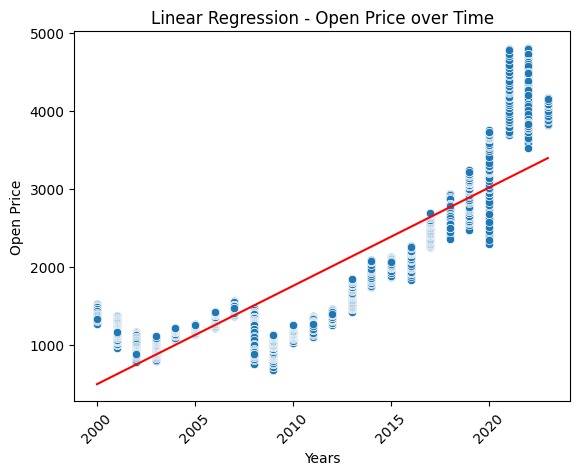

In [6]:
# historical linear regression

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

X = df['Year'].values.reshape(-1, 1)
y = df['Open']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

df['Date_Num'] = df['Year']

sns.scatterplot(x='Date_Num', y='Open', data=df)
plt.plot(df['Date_Num'], y_pred, color='red')
plt.title('Linear Regression - Open Price over Time')
plt.xlabel('Years')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


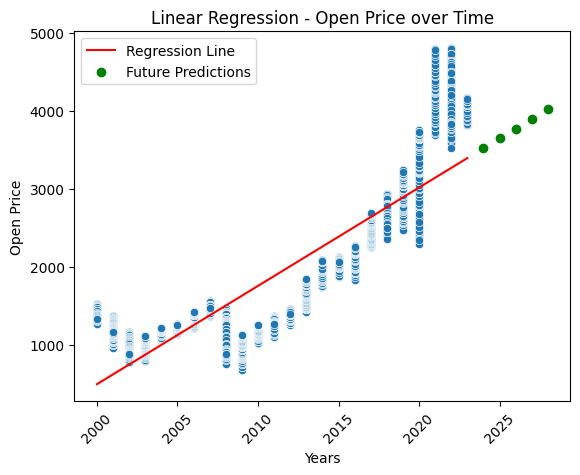

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year

X = df['Year'].values.reshape(-1, 1)
y = df['Open']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

future_years = range(df['Year'].max()+1, df['Year'].max()+6)  # Predicting for the next 5 years
future_X = pd.DataFrame(future_years, columns=['Year'])
future_y_pred = model.predict(future_X)

df['Date_Num'] = df['Year']

sns.scatterplot(x='Date_Num', y='Open', data=df)
plt.plot(df['Date_Num'], y_pred, color='red', label='Regression Line')
plt.scatter(future_X['Year'], future_y_pred, color='green', label='Future Predictions')
plt.title('Linear Regression - Open Price over Time')
plt.xlabel('Years')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


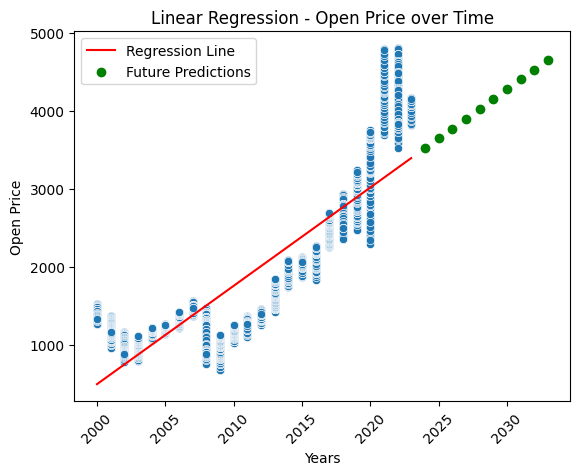

Future Price Predictions:
Year: 2024, Predicted Price: 3521.8057849683973
Year: 2025, Predicted Price: 3647.817624308984
Year: 2026, Predicted Price: 3773.8294636495702
Year: 2027, Predicted Price: 3899.8413029901567
Year: 2028, Predicted Price: 4025.853142330743
Year: 2029, Predicted Price: 4151.86498167133
Year: 2030, Predicted Price: 4277.876821011916
Year: 2031, Predicted Price: 4403.8886603525025
Year: 2032, Predicted Price: 4529.900499693089
Year: 2033, Predicted Price: 4655.912339033675


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/s&p500_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

X = df['Year'].values.reshape(-1, 1)
y = df['Open']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

future_years = range(df['Year'].max() + 1, df['Year'].max() + 11)  # Predicting for the next 10 years
future_X = pd.DataFrame(future_years, columns=['Year'])
future_y_pred = model.predict(future_X)

df['Date_Num'] = df['Year']

sns.scatterplot(x='Date_Num', y='Open', data=df)
plt.plot(df['Date_Num'], y_pred, color='red', label='Regression Line')
plt.scatter(future_X['Year'], future_y_pred, color='green', label='Future Predictions')
plt.title('Linear Regression - Open Price over Time')
plt.xlabel('Years')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("Future Price Predictions:")
for year, price in zip(future_years, future_y_pred):
    print(f"Year: {year}, Predicted Price: {price}")


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


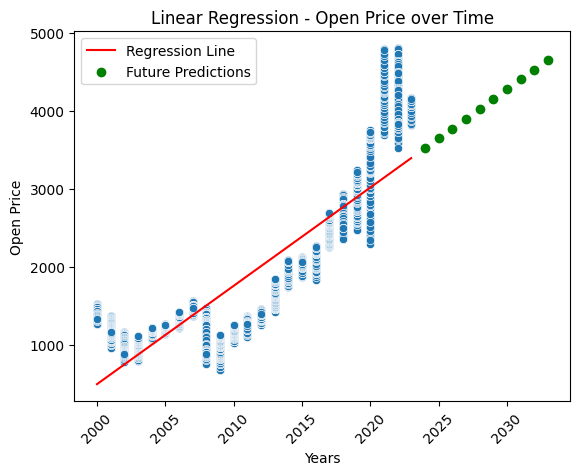

Investment Future Value:
For the date 2024-01-01, the investment value would be 8452.08 USD
For the date 2025-01-01, the investment value would be 8754.50 USD
For the date 2026-01-01, the investment value would be 9056.92 USD
For the date 2027-01-01, the investment value would be 9359.34 USD
For the date 2028-01-01, the investment value would be 9661.76 USD
For the date 2029-01-01, the investment value would be 9964.18 USD
For the date 2030-01-01, the investment value would be 10266.60 USD
For the date 2031-01-01, the investment value would be 10569.02 USD
For the date 2032-01-01, the investment value would be 10871.44 USD
For the date 2033-01-01, the investment value would be 11173.86 USD


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/s&p500_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

X = df['Year'].values.reshape(-1, 1)
y = df['Open']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

# Specify the investment amount and the initial date
investment_amount = 10000
initial_date = '2023-05-01'

# Calculate the future value of the investment
future_years = range(df['Year'].max() + 1, df['Year'].max() + 11)  # Predicting for the next 10 years
future_X = pd.DataFrame(future_years, columns=['Year'])
future_y_pred = model.predict(future_X)

initial_price = df[df['Date'] == initial_date]['Open'].values[0]
initial_shares = investment_amount / initial_price

future_prices = future_y_pred
future_dates = future_X['Year'].apply(lambda x: f"{x}-01-01")
future_values = initial_shares * future_prices

df['Date_Num'] = df['Year']

sns.scatterplot(x='Date_Num', y='Open', data=df)
plt.plot(df['Date_Num'], y_pred, color='red', label='Regression Line')
plt.scatter(future_X['Year'], future_y_pred, color='green', label='Future Predictions')
plt.title('Linear Regression - Open Price over Time')
plt.xlabel('Years')
plt.ylabel('Open Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

print("Investment Future Value:")
for date, value in zip(future_dates, future_values):
    print(f"For the date {date}, the investment value would be {value:.2f} USD")
